In [28]:

#! Todos los Imports del proyecto
from ultralytics import YOLO
import shutil
import getpass
import sys
import time
from kaggle.api.kaggle_api_extended import KaggleApi
import os
import zipfile
import pandas as pd
from collections import Counter

In [54]:
dataset_id = 'giovanijazin/birds-penguins-and-flamingo'
zip_filename = 'birds-penguins-and-flamingo.zip'
dataset_name = 'birds-penguins-and-flamingo'
yaml_path = "./datasets/birds-penguins-and-flamingo/data.yaml"

<h1>Funciones para la configuración de entornos y rutas del sistema</h1>

Configuración de entornos y rutas del sistema en esta parte nos enfocaremos en la configuración de los entornos de <span style="color: orange;">collab</span> y <span style="color:skyblue;">local</span>, siendo estos la estructura en la que nuestro proyecto se desarrollará.

In [2]:

def enviroment_detector():
    """
    Esta función detecta en que entorno
    se está ejecutando sea en un entorno de collab o en local
    """
    
    if 'COLAB_GPU' in os.environ or 'google.colab' in str(get_ipython()):
        return 'colab'
    else:
        return 'local'


def path_builder(zip_filename: str, dataset_name: str):
    """
    Esta función se encarga de construir y remapear las rutas 
    del proyecto en función del entorno en el que se está ejecutando.
    Args:
        zip_filename (str): Nombre del archivo ZIP descargado
        dataset_name (str): Nombre de la carpeta del dataset.

    Returns:
        str: La ruta base del dataset descomprimido.
    """

    enviroment = enviroment_detector()
    dataset_base_dir = 'datasets'

    if enviroment == 'colab':
        base_dir = '/content'
    else:
        base_dir = os.getcwd()

    zip_path = os.path.join(base_dir, zip_filename)
    extract_path = os.path.join(base_dir, dataset_base_dir, dataset_name)

    print(f"Entorno: {enviroment}")
    print(f"Ruta de extracción: {extract_path}")

    #? Comprueba si existen los directorios base y sino, los crea.

    if not os.path.exists(extract_path):
        os.makedirs(extract_path, exist_ok=True) 

    #? Comprueba s el archivo zip existe
    if os.path.exists(zip_path):
        #? Comprueba si el archivo fue descomprimido. 
        if not os.path.exists(os.path.join(extract_path, "train/images")):
            print("Descomprimiendo el archivo zip...")
            try: 
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    zip_ref.extractall(extract_path)
                print("Archivo zip descomprimido exitosamente.")
            except Exception as e:
                print(f"Error al descomprimir el archivo zip: {e}")
        else:
            print("El archivo zip ya ha sido descomprimido.")
    else:
        print(f"El archivo'{zip_filename}'no existe en' {base_dir}")
    
    
    return extract_path

            


Configuración de la API nde Kaggle en base al entorno de ejecución y el sistema operativo.

In [3]:


def kaggle_setup(file_name: str = 'kaggle.json'):
    """
    Esta función se encargar de configurar, subir, 
    mover la API conseguida en Kaggle.

    """

    enviroment = enviroment_detector()
    kaggle_dir = os.path.join(os.path.expanduser('~'), '.kaggle')
    dest_file = os.path.join(kaggle_dir, file_name)

    if not os.path.exists(kaggle_dir):
        os.makedirs(kaggle_dir, exist_ok=True)
    
    if os.path.exists(dest_file):
        print(f"El archivo '{file_name}'ya existe.")
        return

    if enviroment == 'colab':
        print("El enviroment en uso es Colab")
        try:
            from google.colab import files
            print("Por favor suba el archivo kaggle.json")
            uploaded = files.upload()

            if file_name in uploaded:
                shutil.move(file_name, dest_file)
                print(f"Archivo '{file_name}' subido y movido exitosamente.")
            else:
                print(f"Archivo selecionado es incorrecto.")
        except ImportError:
            print("No se pudo usar el arhivo. Intenta la configuración manual.")

    else: 
        print("El enviroment en uso es local")
        source_file = os.path.join(os.getcwd(), file_name)

        if os.path.exists(source_file):
            try:
                shutil.copy2(source_file, dest_file)
                print(f"El archivo '{file_name}' copiado con éxito")
            except Exception as e:
                print(f"Error al copiar el archivo '{file_name}': {str(e)}")
                return
        else:
            print(f"Error el archivo '{file_name}' no fue encontrado. \n Por favor colocar el archivo en {os.getcwd()}")
        
        #? Si el sistenma operativo no es Windows
        if os.name != 'nt':
            os.chmod(dest_file, 0o600)

In [4]:

def dataset_request(dataset_request_id: str, zip_filename: str):
    """
    Esta función hace la solicitud del dataset de Kaggle y descarga el zip.
    
    Args:
        dataset_request_id(str): El identificador del dataset (ej. 'giovanijazin/birds-penguins-and-flamingo')
        zip_filename (str): Nombre del archivo ZIP esperado (ej. 'birds-penguins-and-flamingo.zip').
    """

    print("Descargando el dataset...")
    try: 
        api = KaggleApi()
        api.authenticate()

        api.dataset_download_files(dataset_request_id)
        print(f"Dataset '{zip_filename}' descargado correctamente.")
    except Exception as e:
        print(f"ERROR: No se pudo descargar el dataset '{zip_filename}'. Error: {str(e)} Revisa la API o el id del Dataset")
    if os.path.exists(zip_filename):
        print("Dataset descargado correctamente.")
    else:
        print(f"ERROR: El archivo '{zip_filename}' no se encontró. Verifica las credenciales de Kaggle y la ruta.")
    if zip_filename == 'Twice-One-In-A-Million.zip':
        print("""⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀⠀
⣠⣴⢟⣶⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣴⣾⠀⠀⠀⠀⠀
⠀⠾⠋⠙⠂⢀⣠⣴⣶⣶⣶⣾⣿⣿⣟⣹⣾⠇⠀⠀⠀⠀⠀
⠀⠀⠀⢠⣶⣿⠿⠿⣿⣿⢿⡻⢿⡟⠿⠟⠁⠀⠀⠀⠀⠀⠀
⠀⠀⣰⡟⠁⠀⠀⣸⣿⣿⡿⠀⠀⠀⠀⠀⣀⡀⢀⡀⠀⠀⠀
⠀⢰⣿⡅⠀⠀⠀⣾⣿⣷⠁⠀⠀⠀⠀⢿⣿⣿⣮⣿⠂⠀⠀
⠀⢸⣿⣿⣄⠀⢠⣿⣿⠇⢠⣿⣿⣿⡄⠀⣿⣿⡏⠀⠀⠀⠀
⠀⠈⠛⠋⠀⠀⢸⣿⣿⠀⢾⣿⢩⣿⠇⠀⣿⣿⠏⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠸⣿⣿⡀⠘⣿⣾⠏⠁⣰⣿⡟⠀⠀⢀⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠙⠿⣿⡶⠟⢿⣶⣾⡿⠋⠀⣯⠚⢹⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠲⡴⠊⠁
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀""")

In [ ]:
kaggle_setup()

El archivo 'kaggle.json'ya existe.


In [63]:
dataset_request(dataset_id, zip_filename)

Descargando el dataset...
Dataset URL: https://www.kaggle.com/datasets/giovanijazin/birds-penguins-and-flamingo
Dataset 'penguins-and-flamingo.zip' descargado correctamente.
ERROR: El archivo 'penguins-and-flamingo.zip' no se encontró. Verifica las credenciales de Kaggle y la ruta.


In [60]:
path_builder(zip_filename, dataset_name)

Entorno: local
Ruta de extracción: g:\Otros ordenadores\TARTANGA\IABD\Recognition-and-classification-YOLO-\datasets\birds-penguins-and-flamingo
Descomprimiendo el archivo zip...
Archivo zip descomprimido exitosamente.


'g:\\Otros ordenadores\\TARTANGA\\IABD\\Recognition-and-classification-YOLO-\\datasets\\birds-penguins-and-flamingo'

<H2>Estructuración YOLO </H2>

En este apartado configuramos el <span style="color:red">data.yaml</span> el cual será fundamental para la estructura de nuestros modelos.


In [70]:
import yaml

data = {
    'path': './datasets/birds-penguins-and-flamingo',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'names': {
        0: 'Flamingo',
        1: 'Penguin'
    }
}

with open('./datasets/birds-penguins-and-flamingo/data.yaml', 'w') as file:
    yaml.dump(data, file,
              default_flow_style=False,
              sort_keys=False)

In [ ]:


# --- 1. CONFIGURACIÓN E INICIALIZACIÓN DE DATAFRAMES ---

# Nombres de los archivos donde se guardará la comparación de modelos
GLOBAL_FILE = 'yolo_comparacion_global.csv'
CLASE_FILE = 'yolo_comparacion_por_clase.csv'


def initialize_dfs():
    """Carga los DataFrames maestros si existen, o los crea con las columnas requeridas."""

    # Intenta cargar los DataFrames persistentes
    try:
        df_global = pd.read_csv(GLOBAL_FILE)
    except FileNotFoundError:
        # Crea el DataFrame Global si no existe
        df_global = pd.DataFrame(columns=[
            'Modelo_ID', 'mAP50', 'mAP50-95', 'Precision_Media', 'Recall_Medio'
        ])

    try:
        df_clase = pd.read_csv(CLASE_FILE)
    except FileNotFoundError:
        # Crea el DataFrame Por Clase si no existe
        df_clase = pd.DataFrame(columns=[
            'Modelo_ID', 'Class', 'Box-P', 'Box-R', 'Box-F1', 'mAP50', 'mAP50-95'
        ])

    return df_global, df_clase


# --- 2. FUNCIÓN DE EXTRACCIÓN Y EVALUACIÓN ---

def extraer_metricas_yolo(run_name: str, split_to_use: str = 'test') -> tuple:
    """
    Evalúa el modelo usando model.val() y estructura las métricas.
    """
    # Construir la ruta al mejor modelo
    model_path = os.path.join("runs", "detect", run_name, "weights", "best.pt")
    print(f"\n--- Evaluando modelo: {run_name} ({model_path}) ---")

    try:
        model = YOLO(model_path)
    except FileNotFoundError:
        print(f"ERROR: No se encontró el modelo en {model_path}.")
        return None, None

    # Ejecutar la Evaluación
    metrics = model.val(split=split_to_use,
                        verbose=False,
                        save = False)

    # A. EXTRACCIÓN GLOBAL
    global_summary = {
        'Modelo_ID': run_name,
        'mAP50': metrics.box.map50.item(),
        'mAP50-95': metrics.box.map.item(),
        'Precision_Media': metrics.box.mp.item(),
        'Recall_Medio': metrics.box.mr.item()
    }

    # B. EXTRACCIÓN POR CLASE
    list_clase_summary = []

    # Obtener los datos numéricos brutos
    P_cls = metrics.box.p.tolist()
    R_cls = metrics.box.r.tolist()
    ap50_cls = metrics.box.ap50.tolist()
    ap_mean_cls = metrics.box.all_ap.mean(axis=1).tolist()

    for cls_id, name in metrics.names.items():
        P, R = P_cls[cls_id], R_cls[cls_id]
        Box_F1 = 2 * (P * R) / (P + R) if (P + R) > 0 else 0.0

        clase_dict = {
            'Class': name,
            'Box-P': P,
            'Box-R': R,
            'Box-F1': Box_F1,
            'mAP50': ap50_cls[cls_id],
            'mAP50-95': ap_mean_cls[cls_id]
        }
        list_clase_summary.append(clase_dict)

   # print("✅ Métricas extraídas exitosamente.")
    return global_summary, list_clase_summary


# --- 3. FUNCIÓN DE AGREGACIÓN Y COMPARACIÓN ---

def agregar_metricas_a_comparador(run_name: str, split_to_use: str = 'test'):
    """
    Función principal: Evalúa un modelo y agrega sus resultados a los DataFrames maestros.
    """

    # Cargar los DataFrames maestros actualizados (asegurando persistencia)
    df_global_comparacion, df_clase_comparacion = _initialize_dfs()

    # Obtener las métricas del modelo actual
    global_summary, list_clase_summary = extraer_metricas_yolo(run_name, split_to_use)

    if global_summary is None:
        return df_global_comparacion, df_clase_comparacion

    # === A. PROCESAR Y AGREGAR RESUMEN GLOBAL ===

    # 1. Eliminar duplicado (si el modelo ya estaba)
    df_global_comparacion = df_global_comparacion[df_global_comparacion['Modelo_ID'] != run_name]

    # 2. Añadir la nueva fila (con pd.concat)
    nueva_fila_global = pd.Series(global_summary)
    df_global_comparacion = pd.concat([df_global_comparacion, nueva_fila_global.to_frame().T], ignore_index=True)

    # === B. PROCESAR Y AGREGAR RESUMEN POR CLASE ===

    # 1. Preparar el DataFrame de clases
    df_new_clases = pd.DataFrame(list_clase_summary)
    df_new_clases.insert(0, 'Modelo_ID', run_name) # Añadir el ID del modelo

    # 2. Eliminar filas viejas del modelo y añadir las nuevas filas
    df_clase_comparacion = df_clase_comparacion[df_clase_comparacion['Modelo_ID'] != run_name]
    df_clase_comparacion = pd.concat([df_clase_comparacion, df_new_clases], ignore_index=True)

    # === C. GUARDAR Y DEVOLVER RESULTADOS ===

    # Guardar los DataFrames actualizados en disco
    df_global_comparacion.to_csv(GLOBAL_FILE, index=False)
    df_clase_comparacion.to_csv(CLASE_FILE, index=False)

    print(f"\n✨ Comparación actualizada. Resultados guardados en {GLOBAL_FILE} y {CLASE_FILE}.")

    return df_global_comparacion, df_clase_comparacion

In [3]:
# 1. Cargar el modelo (nano, el más pequeño)
model = YOLO("yolo11n.pt")

# Afinar el modelo
baseline_n = model.train(data="./datasets/birds-penguins-and-flamingo/data.yaml",
                      epochs=10, # Número de iteraciones
                      imgsz=640, # Tamaño de las imágenes (máxima dimensión)
                      #batch = 32,
                     # patience = 5, Si en 5 épocas seguidas no mejora el mAP, para el entrenamiento
                      plots=True, # Guardar gráficos de entrenamiento
                      name = "baseline_n"
                      )

Ultralytics 8.3.237  Python-3.11.14 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./datasets/birds-penguins-and-flamingo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=baseline_n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience

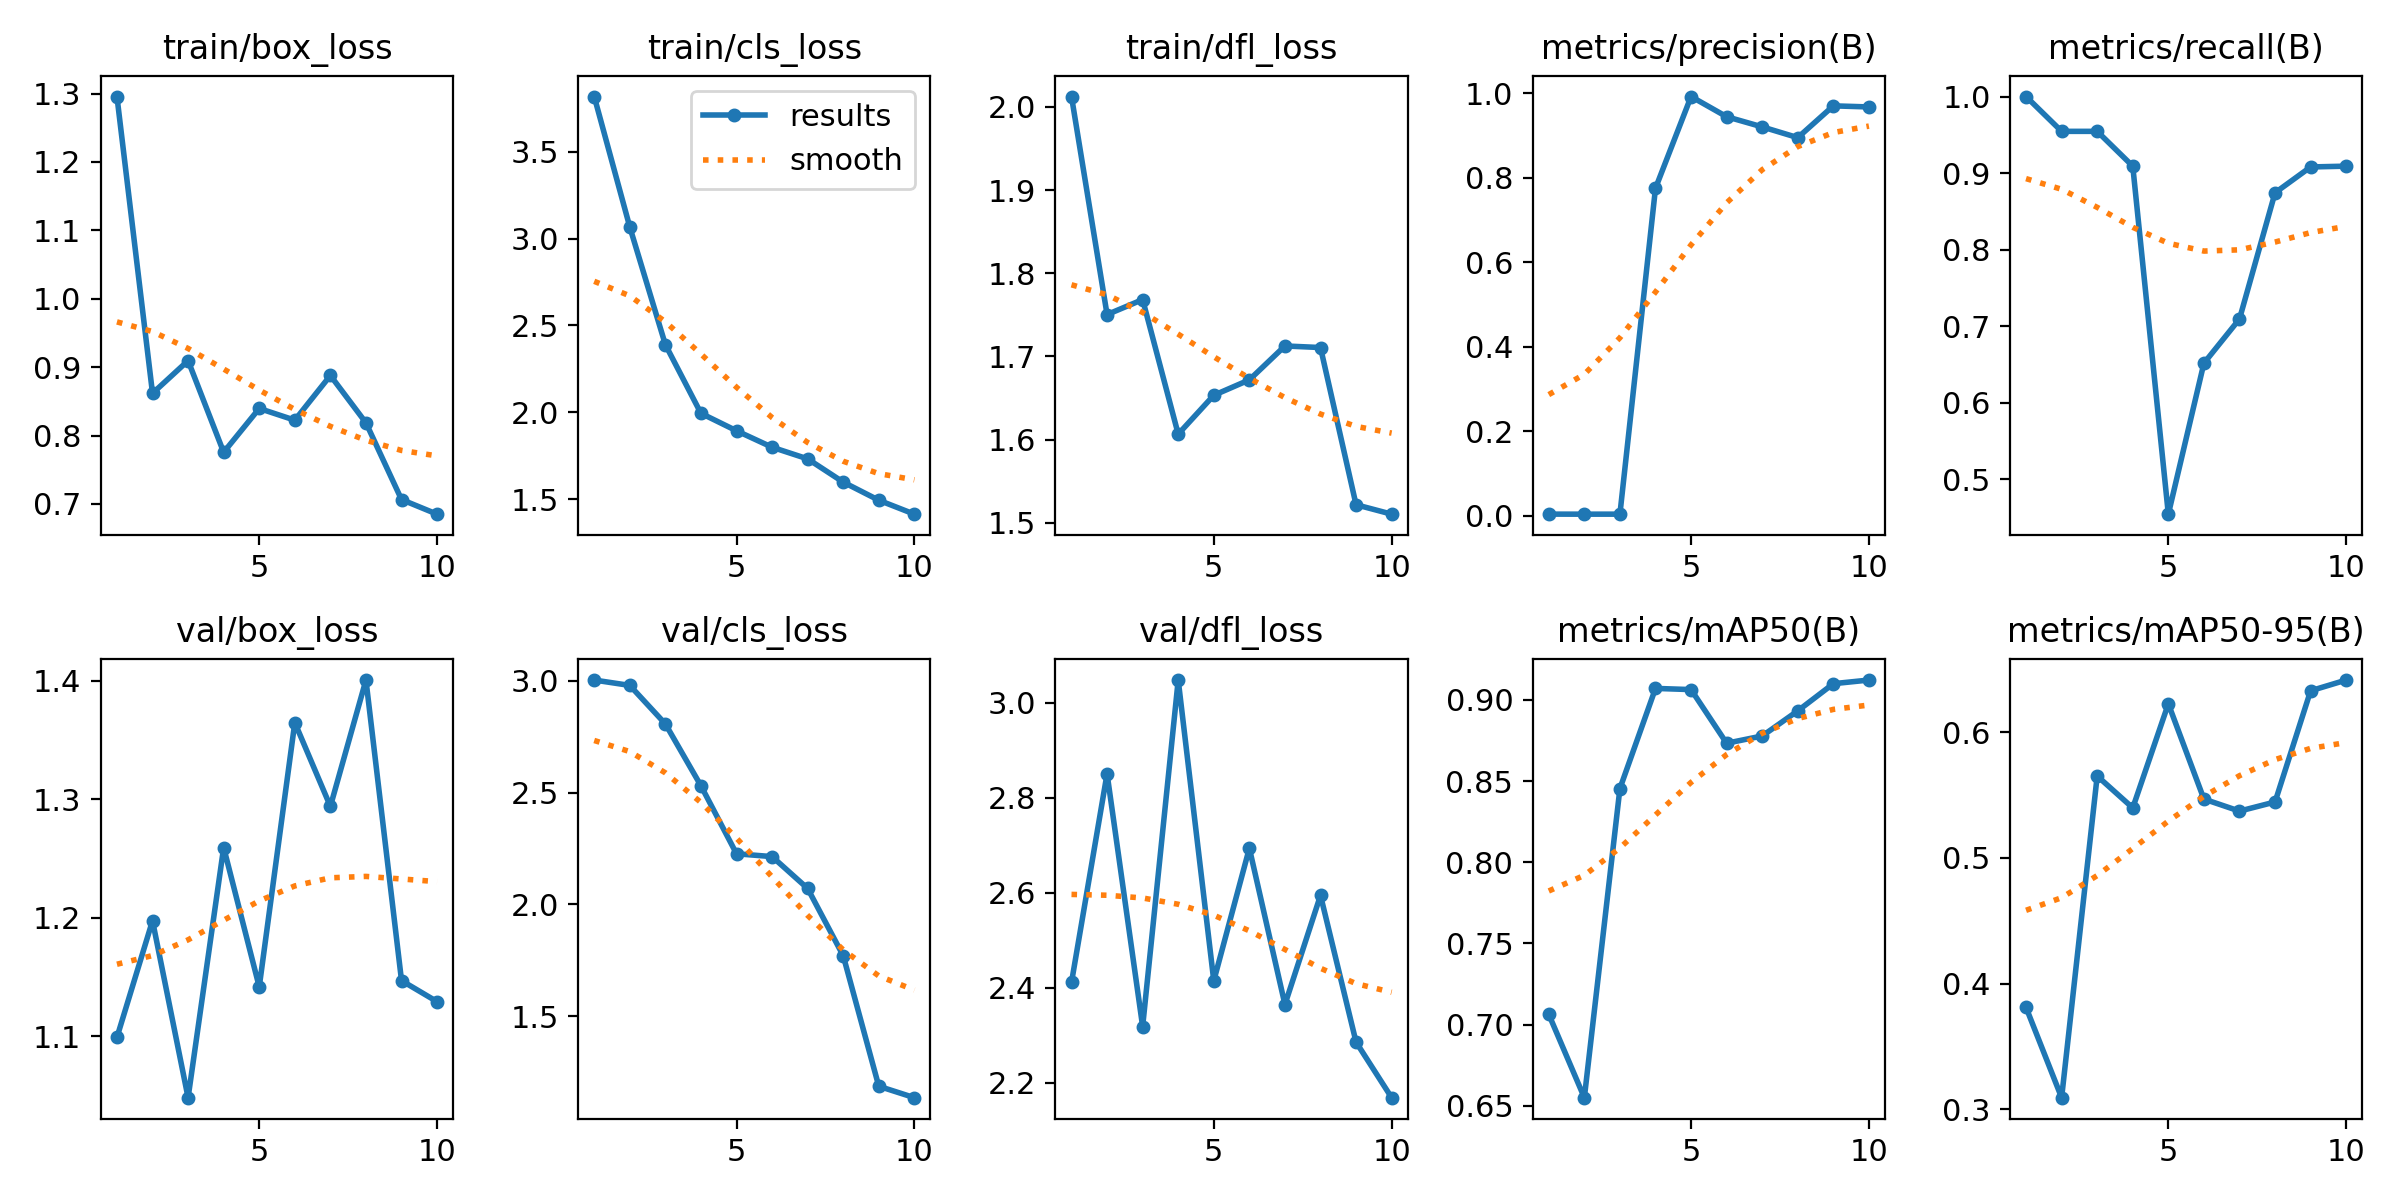

In [39]:
from IPython.display import Image as IPyImage

IPyImage(filename='./runs/detect/baseline_n/results.png', width=800)

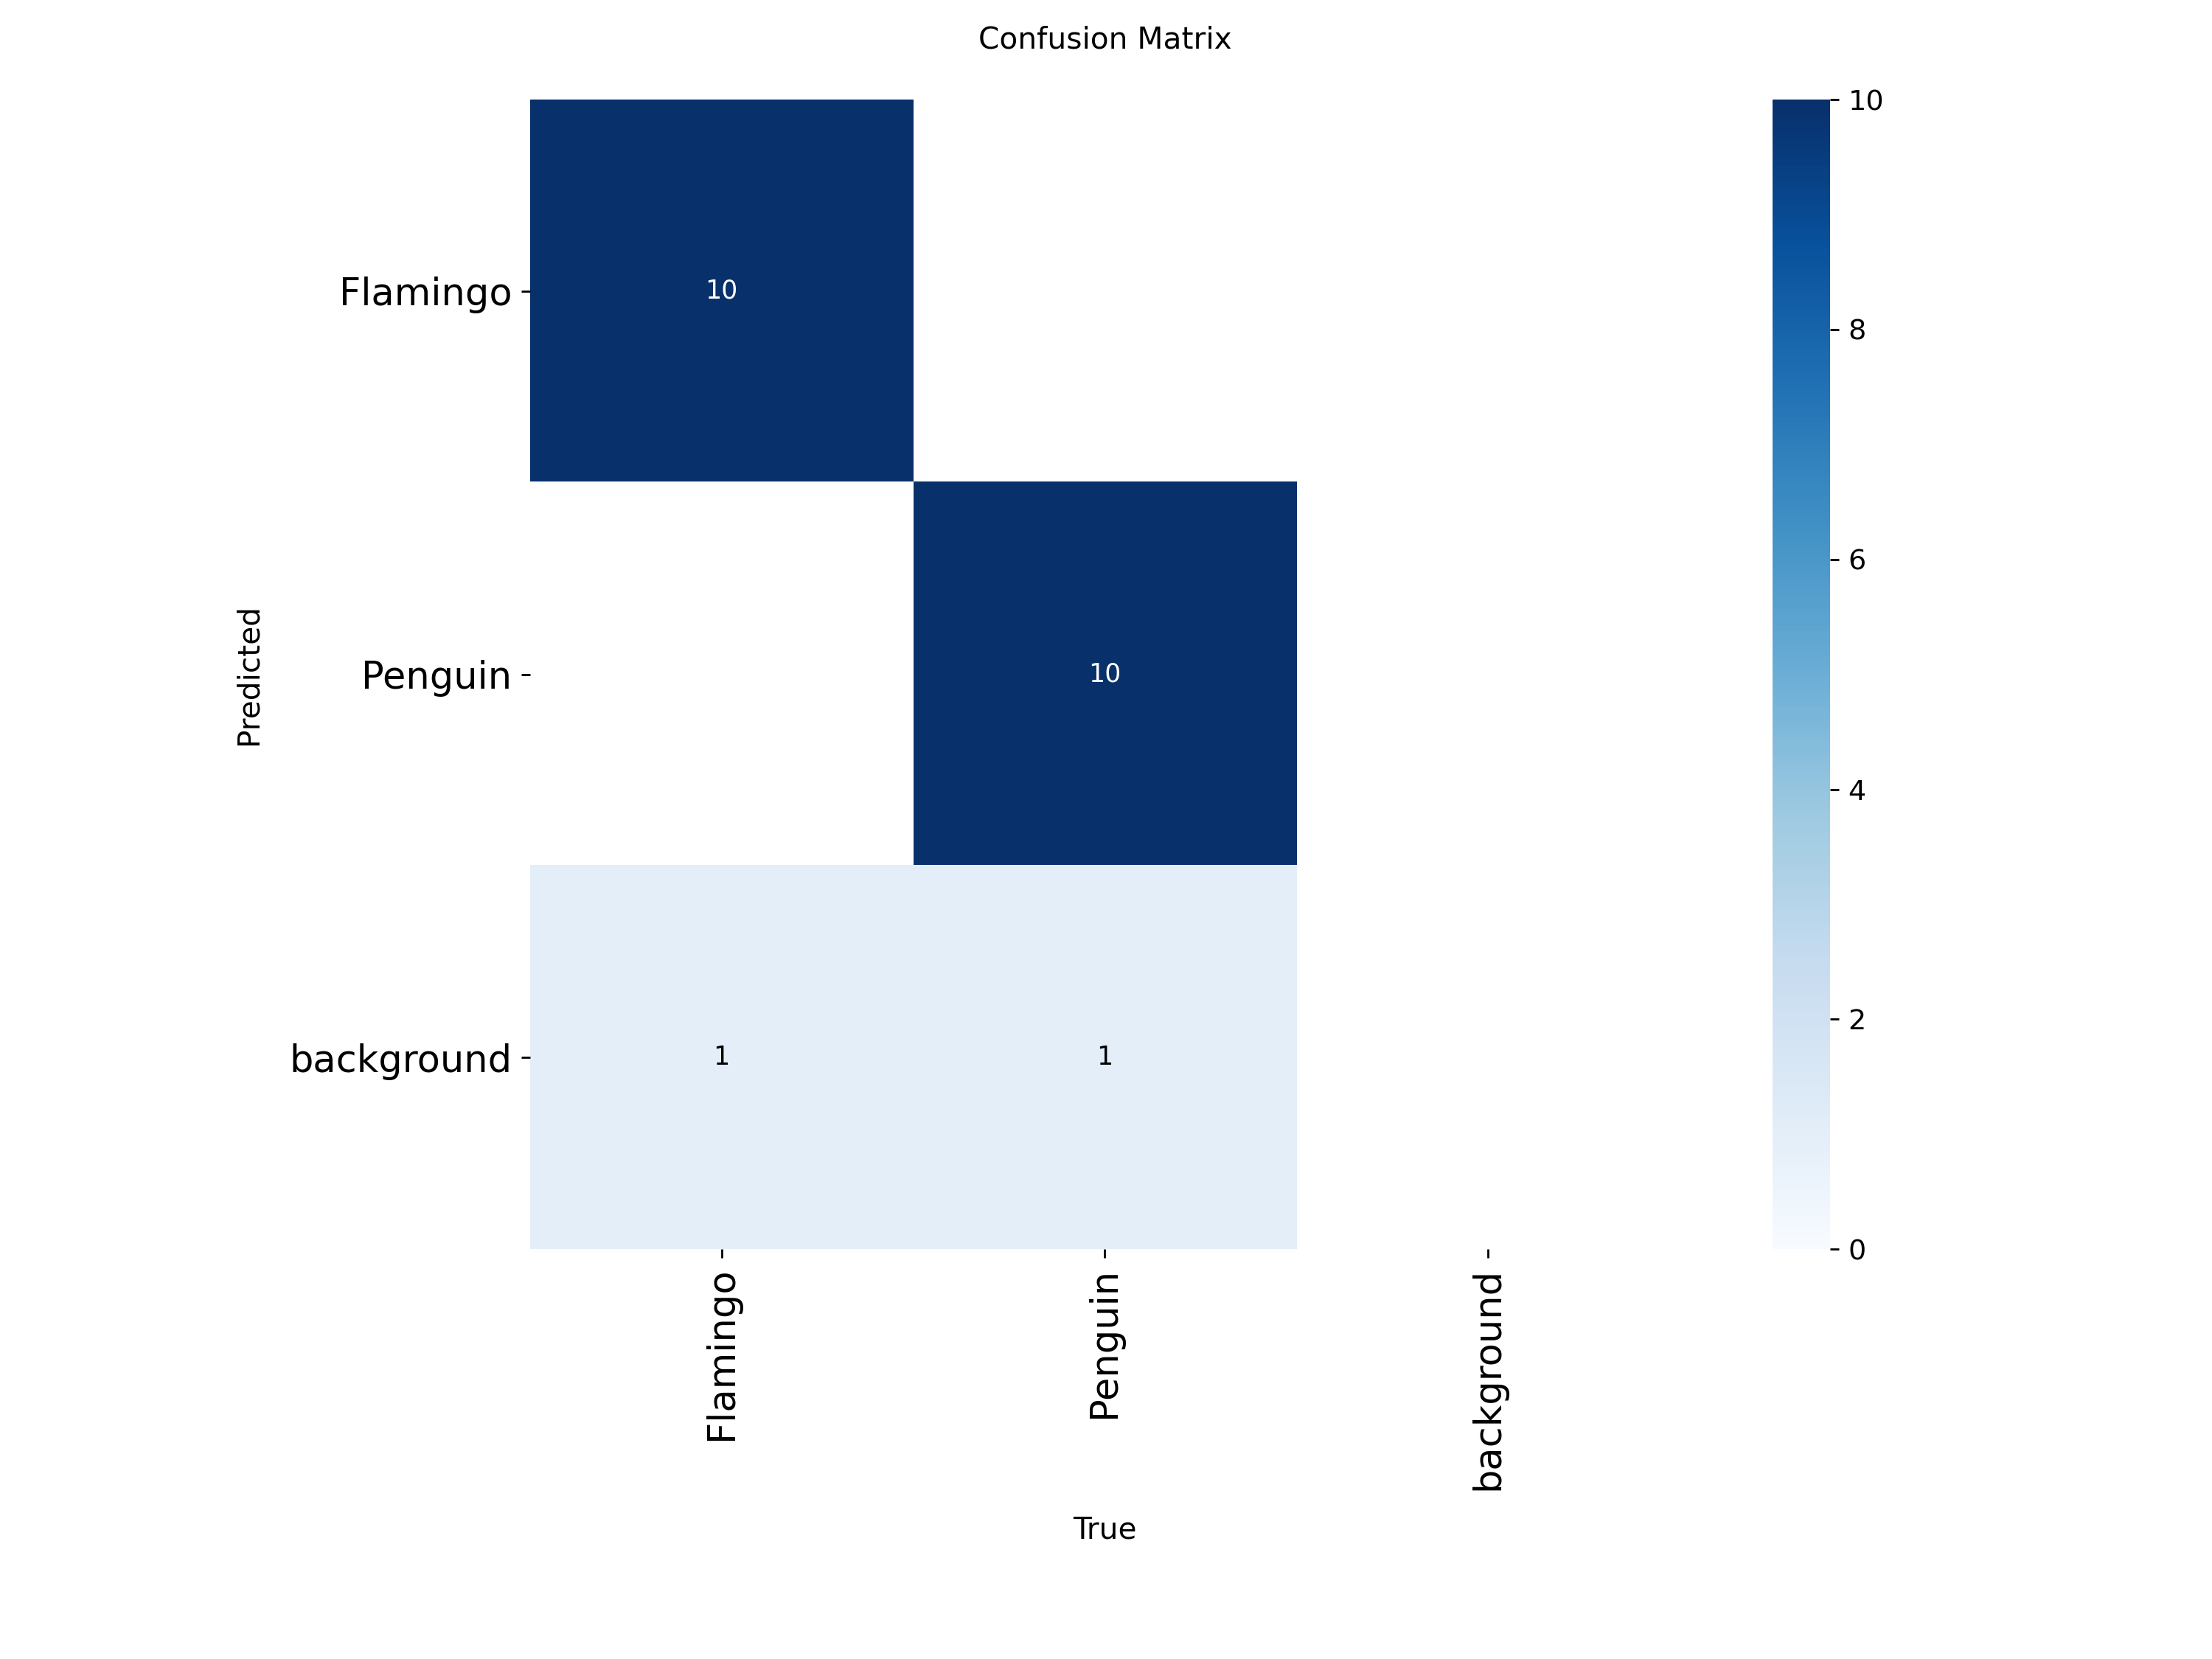

In [13]:
IPyImage(filename='./runs/detect/baseline_n/confusion_matrix.png', width=600)

In [14]:
model = YOLO('./runs/detect/baseline_n/weights/best.pt')

In [16]:
preds = model('./datasets/birds-penguins-and-flamingo/test/images')


image 1/10 g:\Otros ordenadores\TARTANGA\IABD\Recognition-and-classification-YOLO-\datasets\birds-penguins-and-flamingo\test\images\006_jpg.rf.b8ac5e1d3b6f751e043614f654681a18.jpg: 640x640 1 Flamingo, 19.6ms
image 2/10 g:\Otros ordenadores\TARTANGA\IABD\Recognition-and-classification-YOLO-\datasets\birds-penguins-and-flamingo\test\images\006_jpg.rf.da48b216a17c5299ddd5487e1a125fd8.jpg: 640x640 1 Penguin, 17.4ms
image 3/10 g:\Otros ordenadores\TARTANGA\IABD\Recognition-and-classification-YOLO-\datasets\birds-penguins-and-flamingo\test\images\014_jpg.rf.0a8bedf76aa9d3bdce579f868ac931b5.jpg: 640x640 1 Penguin, 18.6ms
image 4/10 g:\Otros ordenadores\TARTANGA\IABD\Recognition-and-classification-YOLO-\datasets\birds-penguins-and-flamingo\test\images\018_jpg.rf.35c95436f7a2c836aefd24f1157a7d7f.jpg: 640x640 1 Penguin, 16.5ms
image 5/10 g:\Otros ordenadores\TARTANGA\IABD\Recognition-and-classification-YOLO-\datasets\birds-penguins-and-flamingo\test\images\027_jpg.rf.abe289b6d8313ee28ba880f3010

In [25]:
import numpy as np
idx = np.random.randint(len(preds))
preds[idx].show()

In [24]:
print(preds[2].boxes[0])

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.], device='cuda:0')
conf: tensor([0.9173], device='cuda:0')
data: tensor([[ 33.3178,   1.5685, 213.7763, 222.8260,   0.9173,   1.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (224, 224)
shape: torch.Size([1, 6])
xywh: tensor([[123.5470, 112.1973, 180.4585, 221.2576]], device='cuda:0')
xywhn: tensor([[0.5515, 0.5009, 0.8056, 0.9878]], device='cuda:0')
xyxy: tensor([[ 33.3178,   1.5685, 213.7763, 222.8260]], device='cuda:0')
xyxyn: tensor([[0.1487, 0.0070, 0.9544, 0.9948]], device='cuda:0')


In [27]:
UMBRAL_CONF = 0.7
boxes = [box for box in preds[0].boxes if box.conf > UMBRAL_CONF]
print(len(boxes))

1


In [ ]:
conteos = Counter([int(box.cls) for box in boxes])
conteos

Counter({0: 1})

In [31]:
import cv2 # OpenCV
import matplotlib.pyplot as plt

# Mapear categoría de objeto a nombres e imprimir conteos
nombres = model.names
print("\nConteos:")
for cls_id, num in conteos.items():
    print(f"{nombres[cls_id]}: {num}")


# Extraer imagen con los bounding boxes > UMBRAL_CONF
p = preds[0] # Predicción
mascara = p.boxes.conf > UMBRAL_CONF
p.boxes = p.boxes[mascara]
img_bboxes = p.plot() # Imagen con los bounding boxes filtrados

# Añadir anotación mostrando los conteos (esquina superior izquierda)
anotacion = ", ".join([f"{nombres[c]}: {n}" for c, n in conteos.items()])
cv2.putText(img_bboxes, anotacion, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (0, 255, 0), 2)

# Convertir imagen de BGR a RGB
img_bboxes_rgb = cv2.cvtColor(img_bboxes, cv2.COLOR_BGR2RGB)

# Y mostrarla
plt.figure(figsize=(12, 8))
plt.imshow(img_bboxes_rgb)
plt.axis("off")


Conteos:
Flamingo: 1


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

In [32]:
from collections import Counter
import cv2
import matplotlib.pyplot as plt

def mostrar_conteos(modelo, ruta_img, umbral=0.5):
    """
    Función simplificada para contar objetos en una imagen.
    1. Detecta (filtrando por confianza).
    2. Cuenta.
    3. Muestra el resultado.
    """
    # 1. Predicción con filtro automático de confianza (conf=umbral)
    # Esto hace que el modelo ignore las cajas con baja probabilidad
    resultados = modelo(ruta_img, conf=umbral, verbose=False)
    pred = resultados[0]

    # 2. Realizar el conteo
    # pred.boxes.cls es una lista con los IDs de los objetos encontrados (ej: [0, 0, 0])
    clases_encontradas = [int(c) for c in pred.boxes.cls]
    conteos = Counter(clases_encontradas)

    # 3. Imprimir resultados (Texto)
    print(f"\n--- Conteo de objetos (Confianza > {umbral}) ---")
    if not conteos:
        print("No se detectaron objetos con suficiente confianza.")

    for id_clase, cantidad in conteos.items():
        nombre_objeto = modelo.names[id_clase]
        print(f" -> {nombre_objeto}: {cantidad}")

    # 4. Mostrar imagen (Gráfico)
    # plot() dibuja las cajas que pasaron el filtro
    img_con_cajas = pred.plot()

    # Convertir de BGR (OpenCV) a RGB (Matplotlib) para que los colores se vean bien
    img_rgb = cv2.cvtColor(img_con_cajas, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

    return conteos

In [34]:
import os

RUTA_TST = './datasets/birds-penguins-and-flamingo/test/images/'
rutas_imgs = [f for f in os.listdir(RUTA_TST) if f.endswith('.jpg')]
rutas_imgs

['006_jpg.rf.b8ac5e1d3b6f751e043614f654681a18.jpg',
 '006_jpg.rf.da48b216a17c5299ddd5487e1a125fd8.jpg',
 '014_jpg.rf.0a8bedf76aa9d3bdce579f868ac931b5.jpg',
 '018_jpg.rf.35c95436f7a2c836aefd24f1157a7d7f.jpg',
 '027_jpg.rf.abe289b6d8313ee28ba880f301019444.jpg',
 '029_jpg.rf.d0198ddff4f9b217429c52409d407f04.jpg',
 '034_jpg.rf.ce0579db7257276f6e23e6fcbea9a48f.jpg',
 '044_jpg.rf.db2dd323441e654dce5019624fb5b75c.jpg',
 '049_jpg.rf.d4697efb88c0755b230056285548aefa.jpg',
 '050_jpg.rf.699e5da78e15d5778695e2d64053e0d7.jpg']

In [35]:
conteo = mostrar_conteos(model, RUTA_TST + rutas_imgs[6])


--- Conteo de objetos (Confianza > 0.5) ---
 -> Flamingo: 1


<Figure size 1200x800 with 1 Axes>

<Figure size 1000x600 with 1 Axes>

In [36]:
import pandas as pd
def cear_metricas(modelo:str):
  metrics_path = "./runs/detect/{modelo}/results.csv"
  df = pd.read_csv(df = pd.read_csv(metrics_path, sep=',', skipinitialspace=True))
  time = df["time"].sum()
  box_loss = df["test/box_loss"].mean()
  cls_loss = df["metrics/recall(B)"]

In [ ]:


# 1. Cargar el modelo (nano, el más pequeño)
model = YOLO("yolo11s.pt")

# Afinar el modelo
baseline_s = model.train(data=yaml_path,
                      epochs=10, # Número de iteraciones
                      imgsz=640, # Tamaño de las imágenes (máxima dimensión)
                      #batch = 32,
                     # patience = 5, Si en 5 épocas seguidas no mejora el mAP, para el entrenamiento
                      plots=True, # Guardar gráficos de entrenamiento
                      name = "baseline_s"
                      )

Ultralytics 8.3.237  Python-3.11.14 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./datasets/birds-penguins-and-flamingo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=baseline_s2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

In [49]:
baseline_n.summary()

[{'Class': 'Flamingo',
  'Images': np.int64(10),
  'Instances': np.int64(11),
  'Box-P': np.float64(0.99822),
  'Box-R': np.float64(0.90909),
  'Box-F1': np.float64(0.95157),
  'mAP50': np.float64(0.911),
  'mAP50-95': np.float64(0.60009)},
 {'Class': 'Penguin',
  'Images': np.int64(10),
  'Instances': np.int64(11),
  'Box-P': np.float64(0.93682),
  'Box-R': np.float64(0.90909),
  'Box-F1': np.float64(0.92275),
  'mAP50': np.float64(0.91346),
  'mAP50-95': np.float64(0.67763)}]

In [52]:
baseline_s.summary()

[{'Class': 'Flamingo',
  'Images': np.int64(10),
  'Instances': np.int64(11),
  'Box-P': np.float64(0.9995),
  'Box-R': np.float64(0.81818),
  'Box-F1': np.float64(0.8998),
  'mAP50': np.float64(0.8969),
  'mAP50-95': np.float64(0.48589)},
 {'Class': 'Penguin',
  'Images': np.int64(10),
  'Instances': np.int64(11),
  'Box-P': np.float64(0.95954),
  'Box-R': np.float64(0.90909),
  'Box-F1': np.float64(0.93364),
  'mAP50': np.float64(0.9248),
  'mAP50-95': np.float64(0.63291)}]

In [ ]:


# --- 1. CONFIGURACIÓN E INICIALIZACIÓN DE DATAFRAMES ---

# Nombres de los archivos donde se guardará la comparación de modelos
GLOBAL_FILE = 'yolo_comparacion_global.csv'
CLASE_FILE = 'yolo_comparacion_por_clase.csv'


def initialize_dfs():
    """Carga los DataFrames maestros si existen, o los crea con las columnas requeridas."""

    # Intenta cargar los DataFrames persistentes
    try:
        df_global = pd.read_csv(GLOBAL_FILE)
    except FileNotFoundError:
        # Crea el DataFrame Global si no existe
        df_global = pd.DataFrame(columns=[
            'Modelo_ID', 'mAP50', 'mAP50-95', 'Precision_Media', 'Recall_Medio'
        ])

    try:
        df_clase = pd.read_csv(CLASE_FILE)
    except FileNotFoundError:
        # Crea el DataFrame Por Clase si no existe
        df_clase = pd.DataFrame(columns=[
            'Modelo_ID', 'Class', 'Box-P', 'Box-R', 'Box-F1', 'mAP50', 'mAP50-95'
        ])

    return df_global, df_clase


# --- 2. FUNCIÓN DE EXTRACCIÓN Y EVALUACIÓN ---

def extraer_metricas_yolo(run_name: str, split_to_use: str = 'test') -> tuple:
    """
    Evalúa el modelo usando model.val() y estructura las métricas.
    """
    # Construir la ruta al mejor modelo
    model_path = os.path.join("runs", "detect", run_name, "weights", "best.pt")
    print(f"\n--- Evaluando modelo: {run_name} ({model_path}) ---")

    try:
        model = YOLO(model_path)
    except FileNotFoundError:
        print(f"❌ ERROR: No se encontró el modelo en {model_path}.")
        return None, None

    # Ejecutar la Evaluación
    metrics = model.val(split=split_to_use,
                        verbose=False,
                        save = False)

    # A. EXTRACCIÓN GLOBAL
    global_summary = {
        'Modelo_ID': run_name,
        'mAP50': metrics.box.map50.item(),
        'mAP50-95': metrics.box.map.item(),
        'Precision_Media': metrics.box.mp.item(),
        'Recall_Medio': metrics.box.mr.item()
    }

    # B. EXTRACCIÓN POR CLASE
    list_clase_summary = []

    # Obtener los datos numéricos brutos
    P_cls = metrics.box.p.tolist()
    R_cls = metrics.box.r.tolist()
    ap50_cls = metrics.box.ap50.tolist()
    ap_mean_cls = metrics.box.all_ap.mean(axis=1).tolist()

    for cls_id, name in metrics.names.items():
        P, R = P_cls[cls_id], R_cls[cls_id]
        Box_F1 = 2 * (P * R) / (P + R) if (P + R) > 0 else 0.0

        clase_dict = {
            'Class': name,
            'Box-P': P,
            'Box-R': R,
            'Box-F1': Box_F1,
            'mAP50': ap50_cls[cls_id],
            'mAP50-95': ap_mean_cls[cls_id]
        }
        list_clase_summary.append(clase_dict)

   # print("✅ Métricas extraídas exitosamente.")
    return global_summary, list_clase_summary


# --- 3. FUNCIÓN DE AGREGACIÓN Y COMPARACIÓN ---

def agregar_metricas_a_comparador(run_name: str, split_to_use: str = 'test'):
    """
    Función principal: Evalúa un modelo y agrega sus resultados a los DataFrames maestros.
    """

    # Cargar los DataFrames maestros actualizados (asegurando persistencia)
    df_global_comparacion, df_clase_comparacion = _initialize_dfs()

    # Obtener las métricas del modelo actual
    global_summary, list_clase_summary = extraer_metricas_yolo(run_name, split_to_use)

    if global_summary is None:
        return df_global_comparacion, df_clase_comparacion

    # === A. PROCESAR Y AGREGAR RESUMEN GLOBAL ===

    # 1. Eliminar duplicado (si el modelo ya estaba)
    df_global_comparacion = df_global_comparacion[df_global_comparacion['Modelo_ID'] != run_name]

    # 2. Añadir la nueva fila (con pd.concat)
    nueva_fila_global = pd.Series(global_summary)
    df_global_comparacion = pd.concat([df_global_comparacion, nueva_fila_global.to_frame().T], ignore_index=True)

    # === B. PROCESAR Y AGREGAR RESUMEN POR CLASE ===

    # 1. Preparar el DataFrame de clases
    df_new_clases = pd.DataFrame(list_clase_summary)
    df_new_clases.insert(0, 'Modelo_ID', run_name) # Añadir el ID del modelo

    # 2. Eliminar filas viejas del modelo y añadir las nuevas filas
    df_clase_comparacion = df_clase_comparacion[df_clase_comparacion['Modelo_ID'] != run_name]
    df_clase_comparacion = pd.concat([df_clase_comparacion, df_new_clases], ignore_index=True)

    # === C. GUARDAR Y DEVOLVER RESULTADOS ===

    # Guardar los DataFrames actualizados en disco
    df_global_comparacion.to_csv(GLOBAL_FILE, index=False)
    df_clase_comparacion.to_csv(CLASE_FILE, index=False)

    print(f"\n✨ Comparación actualizada. Resultados guardados en {GLOBAL_FILE} y {CLASE_FILE}.")

    return df_global_comparacion, df_clase_comparacion

In [55]:
extraer_metricas_yolo("baseline_l", "test")


--- Evaluando modelo: baseline_l (runs/detect/baseline_l/weights/best.pt) ---
Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 436.7±201.2 MB/s, size: 8.0 KB)
val: Scanning /content/datasets/penguins-and-flamingos/test/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 10/10 11.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 2.0it/s 0.5s
                   all         10         12      0.802      0.686      0.715      0.525
Speed: 1.8ms preprocess, 39.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/runs/detect/val12


({'Modelo_ID': 'baseline_l',
  'mAP50': 0.7151536661143332,
  'mAP50-95': 0.5254034094172881,
  'Precision_Media': 0.8017879886592375,
  'Recall_Medio': 0.6857142857142857},
 [{'Class': 'Flamingo',
   'Box-P': 0.9626785484465233,
   'Box-R': 0.8,
   'Box-F1': 0.8738324289882097,
   'mAP50': 0.8538235294117648,
   'mAP50-95': 0.6328921568627451},
  {'Class': 'Penguin',
   'Box-P': 0.6408974288719517,
   'Box-R': 0.5714285714285714,
   'Box-F1': 0.6041726435327789,
   'mAP50': 0.5764838028169015,
   'mAP50-95': 0.41791466197183097}])

In [57]:
agregar_metricas_a_comparador("baseline_l", "test")
# 1. Ejecutar y CAPTURAR la salida:





--- Evaluando modelo: baseline_l (runs/detect/baseline_l/weights/best.pt) ---
Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 442.5±97.8 MB/s, size: 8.2 KB)
val: Scanning /content/datasets/penguins-and-flamingos/test/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 10/10 12.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.9it/s 0.5s
                   all         10         12      0.802      0.686      0.715      0.525
Speed: 1.5ms preprocess, 37.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/runs/detect/val13

✨ Comparación actualizada. Resultados guardados en yolo_comparacion_global.csv y yolo_comparacion_por_clase.csv.

--- Evaluando modelo: baseline_l (runs/detect/baseline_l/weights

In [48]:
initialize_dfs()

(    Modelo_ID     mAP50  mAP50-95  Precision_Media  Recall_Medio
 0  baseline_l  0.715154  0.525403         0.801788      0.685714,
     Modelo_ID     Class     Box-P     Box-R    Box-F1     mAP50  mAP50-95
 0  baseline_l  Flamingo  0.962679  0.800000  0.873832  0.853824  0.632892
 1  baseline_l   Penguin  0.640897  0.571429  0.604173  0.576484  0.417915)

In [59]:
# 2. IMPRIMIR las variables CAPTURADAS:
df_global_final

,Modelo_ID,mAP50,mAP50-95,Precision_Media,Recall_Medio
0,baseline_l,0.715154,0.525403,0.801788,0.685714


In [ ]:


# 1. Cargar el modelo (nano, el más pequeño)
inicio = time.time()
model = YOLO("yolo11l.pt")

# Afinar el modelo
baseline_l = model.train(data=yaml_path,
                      epochs=10, # Número de iteraciones
                      imgsz=640, # Tamaño de las imágenes (máxima dimensión)
                      #batch = 32,
                     # patience = 5, Si en 5 épocas seguidas no mejora el mAP, para el entrenamiento
                      plots=True, # Guardar gráficos de entrenamiento
                      name = "baseline_l"
                      )
final = time.time()
beaseline_l_time = final - inicio

Ultralytics 8.3.237  Python-3.11.14 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./datasets/birds-penguins-and-flamingo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=baseline_l, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience